# Customer profiling and segmentation

Project for Data Analytics class

In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
import os

In [2]:
#Loading Dataset
raw_dataset = pd.read_csv('/Users/germanalamillaperalta/DataScience/BlackFriday.csv', skipinitialspace= True)
dataset = raw_dataset.copy()
#dataset.sort_values('User_ID', inplace=True)
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


## Customer Profiling

In [3]:
user_profiles=dataset[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']].drop_duplicates()
user_profiles.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


In [4]:
user_profiles['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [5]:
user_profiles['City_Category'].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

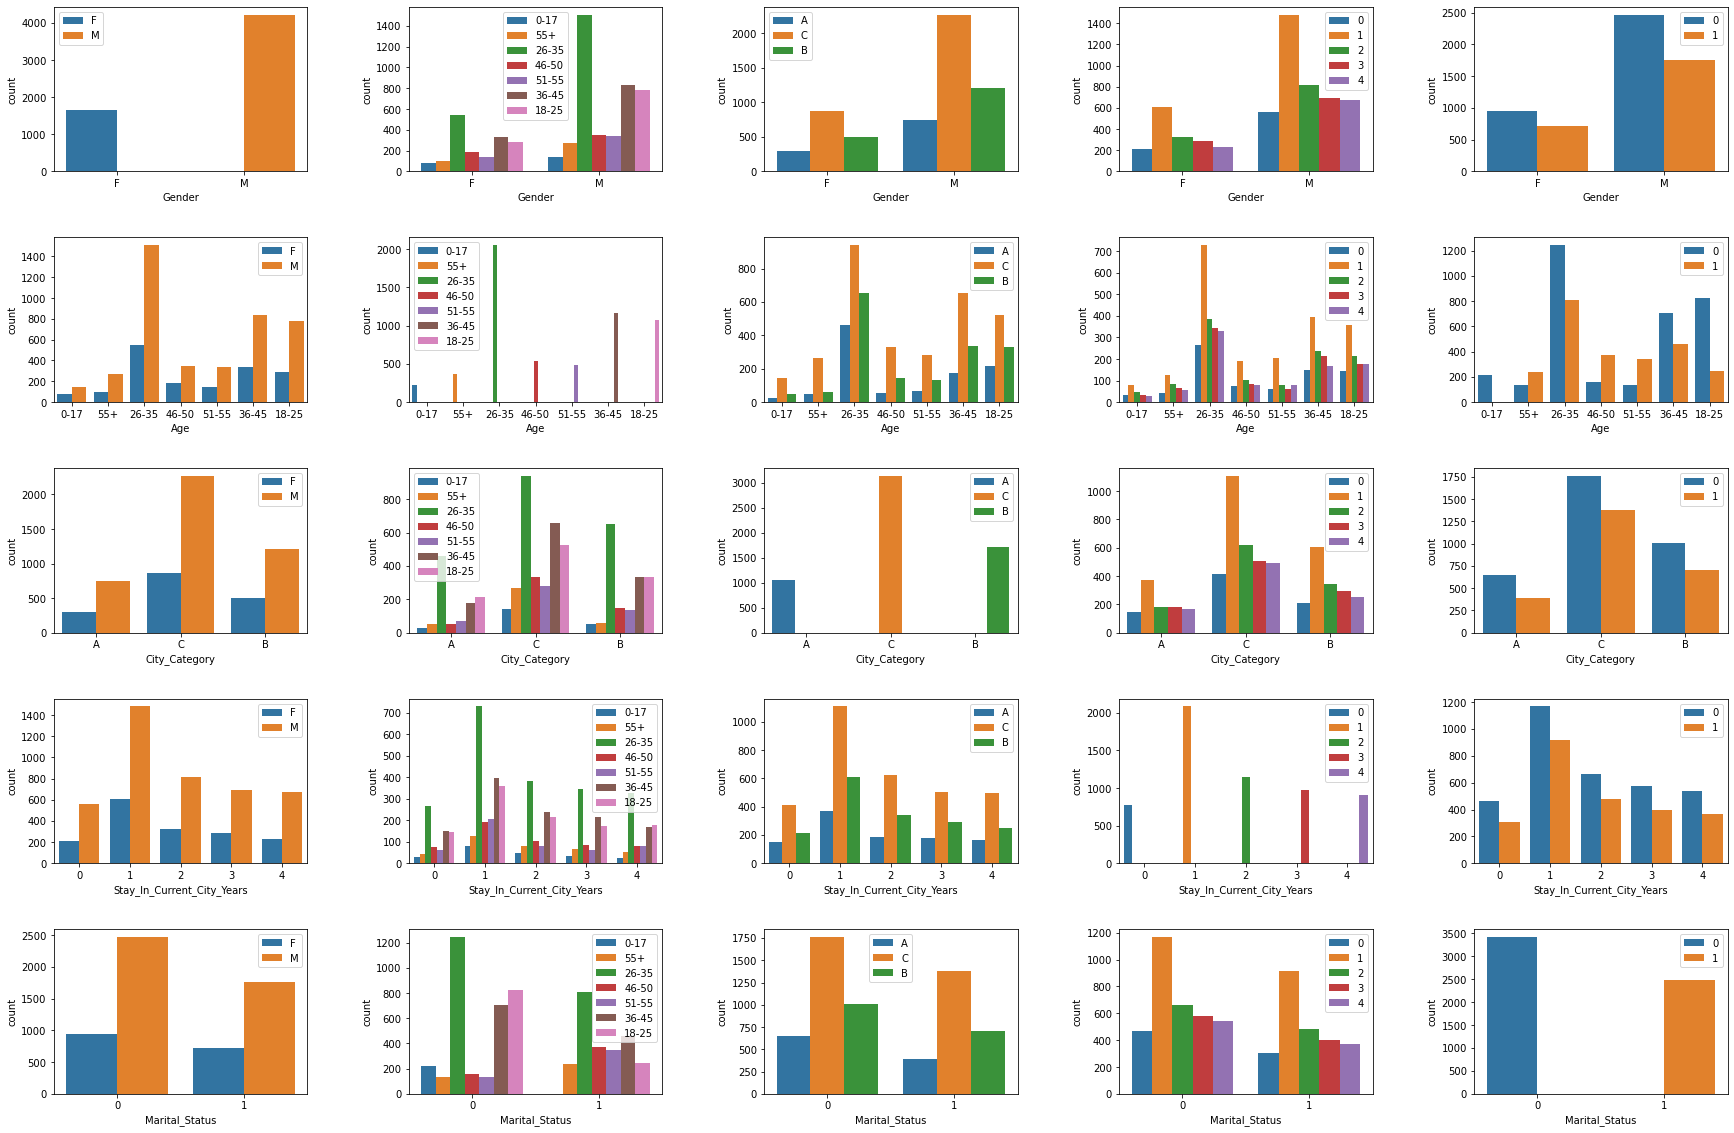

In [6]:
import warnings
warnings.filterwarnings('ignore')

columns=['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, (len(columns)**2)+1):
    ax=fig.add_subplot(len(columns), len(columns), i)
    ax=sns.countplot(user_profiles[columns[int((i-1)/len(columns))]],hue=columns[((i-1)%len(columns))],data=user_profiles)
    ax=plt.legend(loc='best')

plt.show()

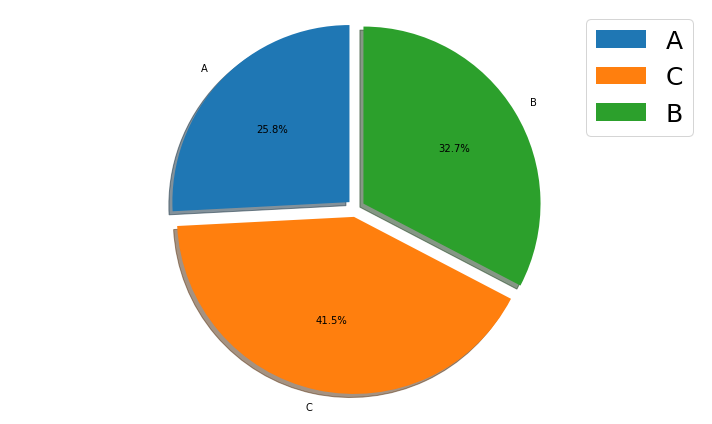

In [7]:
explode = (0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(dataset.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=dataset['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(prop={'size': 25})
plt.show()

<AxesSubplot:xlabel='City_Category', ylabel='count'>

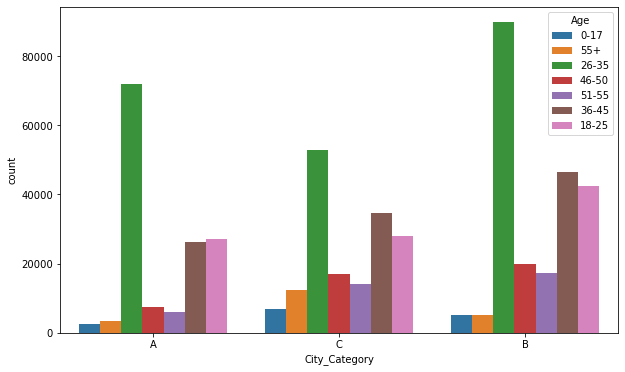

In [8]:
fig1, ax1 = plt.subplots(figsize=(10,6))
sns.countplot(dataset['City_Category'],hue=dataset['Age'])

## RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history by analyzing how recently, how often and how much did they buy.

Valuing customers based on a single parameter is insufficient. RFM model combines three different customer attributes to rank customers. If they bought in recently, they get higher points. If they bought many times, they get higher score. And if they spent bigger, they get more points. Combine these three scores to create the RFM score.

What if we understood our customers a little better and sent them more relevant campaigns?

In [9]:
from pandas import DataFrame

df_freq = dataset.groupby('User_ID').agg(
    #using each product purchased as frequency
    frequency = pd.NamedAgg(column = 'Product_ID', aggfunc = 'count'),
    #total amount purchased by customer in that period
    monetary = pd.NamedAgg(column = 'Purchase', aggfunc = 'sum')
)
df_freq

,frequency,monetary
User_ID,,
1000001,34,333481
1000002,76,810353
1000003,29,341635
1000004,13,205987
1000005,106,821001
...,...,...
1006036,476,3821666
1006037,116,1075037
1006038,10,80859


In [10]:
#averagetransaction
df_freq['averagevalue'] = df_freq['monetary']/df_freq['frequency']
df_freq

,frequency,monetary,averagevalue
User_ID,,,
1000001,34,333481,9808.264706
1000002,76,810353,10662.539474
1000003,29,341635,11780.517241
1000004,13,205987,15845.153846
1000005,106,821001,7745.292453
...,...,...,...
1006036,476,3821666,8028.710084
1006037,116,1075037,9267.560345
1006038,10,80859,8085.900000


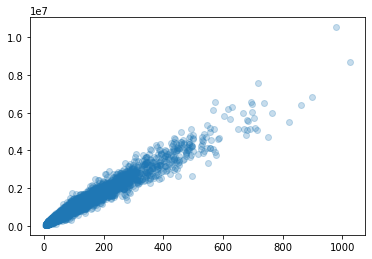

In [11]:
#import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_freq['frequency'], df_freq['monetary'], alpha=0.25)
plt.show()

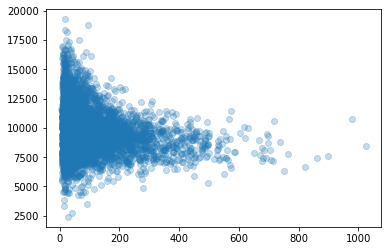

In [12]:
plt.scatter(df_freq['frequency'], df_freq['averagevalue'], alpha=0.25)
plt.show()

In [13]:
maxfreq = df_freq['frequency'].max()
minfreq = df_freq['frequency'].min()

print(maxfreq, minfreq)

maxmonetary = df_freq['monetary'].max()
minmonetary = df_freq['monetary'].min()

print(maxmonetary, minmonetary)

1025 5
10536783 44108


<AxesSubplot:>

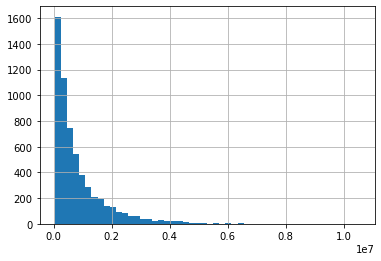

In [14]:
df_freq['monetary'].hist(bins=50)

<AxesSubplot:>

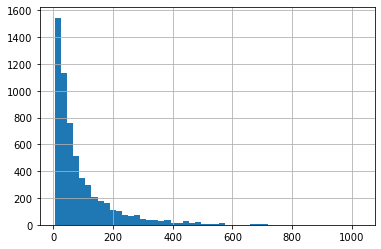

In [15]:
df_freq['frequency'].hist(bins=50)

<AxesSubplot:>

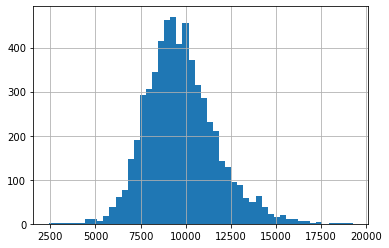

In [16]:
df_freq['averagevalue'].hist(bins=50)

In [17]:
# Map the counts to binnings
df_freq['freqscore'] = pd.qcut(df_freq['frequency'], 5, labels=False)
df_freq['monscore'] = pd.qcut(df_freq['monetary'], 5, labels=False)

df_freq['averagescore'] = pd.qcut(df_freq['averagevalue'], 5, labels= False)

df_freq

,frequency,monetary,averagevalue,freqscore,monscore,averagescore
User_ID,,,,,,
1000001,34,333481,9808.264706,1,1,2
1000002,76,810353,10662.539474,3,3,3
1000003,29,341635,11780.517241,1,1,4
1000004,13,205987,15845.153846,0,1,4
1000005,106,821001,7745.292453,3,3,0
...,...,...,...,...,...,...
1006036,476,3821666,8028.710084,4,4,0
1006037,116,1075037,9267.560345,3,3,2
1006038,10,80859,8085.900000,0,0,0


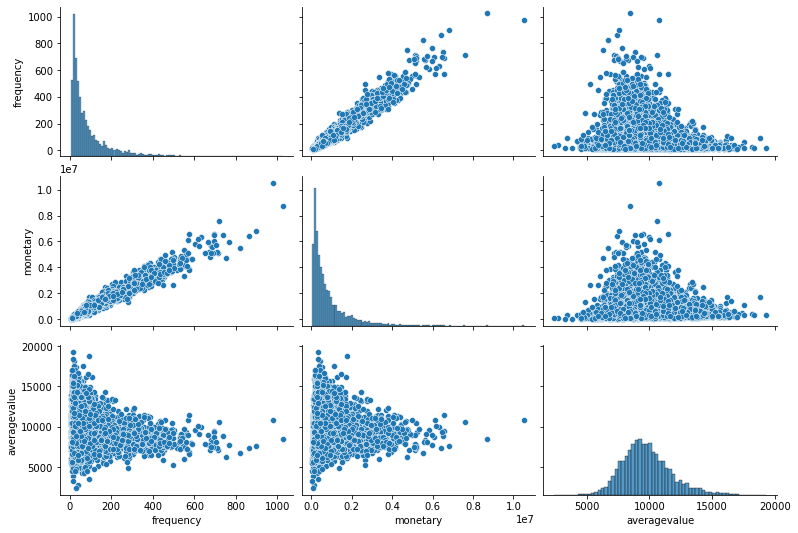

In [18]:
X = df_freq.drop(['freqscore', 'monscore', 'averagescore'], axis=1)
sns.pairplot(X, aspect=1.5)
plt.show()

Text(0, 0.5, 'Inertia')

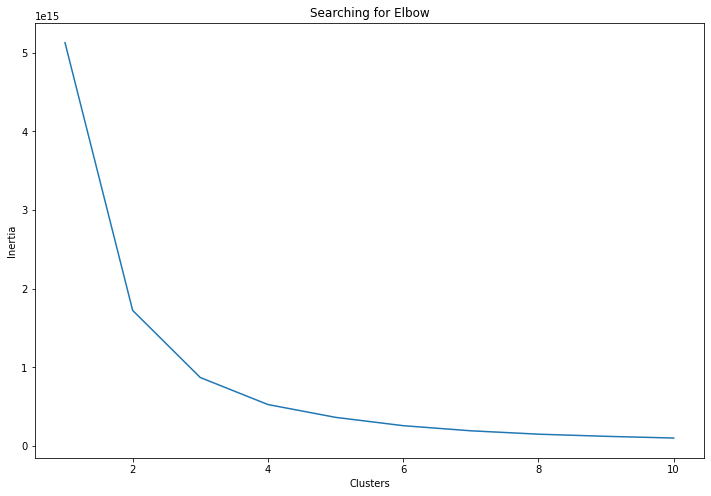

In [19]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

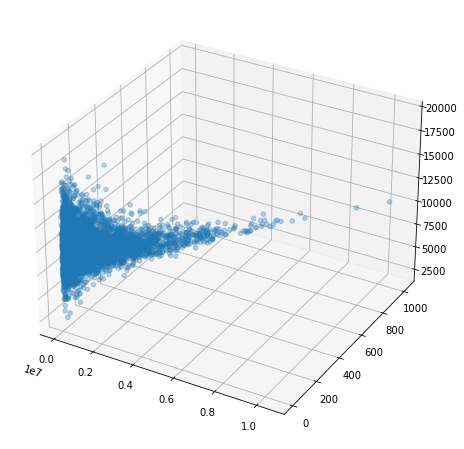

In [35]:
x = df_freq['monetary']
y = df_freq['frequency']
z = df_freq['averagevalue']

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, alpha=0.3)

plt.show()

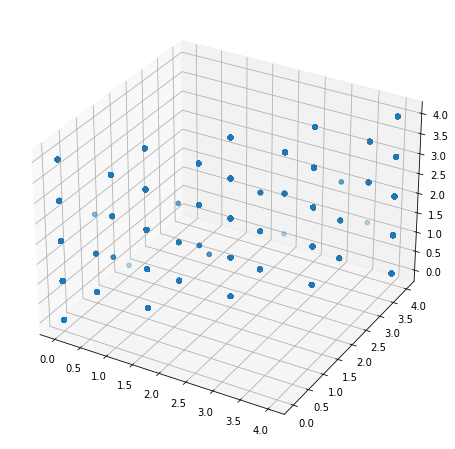

In [36]:
xs = df_freq['monscore']
ys = df_freq['freqscore']
zs = df_freq['averagescore']

fig = plt.figure(figsize= (8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs,ys,zs, alpha=0.3)

plt.show()

In [23]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df_freq[['monetary', 'frequency', 'averagevalue']])

In [24]:
print(y_pred)

[0 4 0 ... 0 0 1]


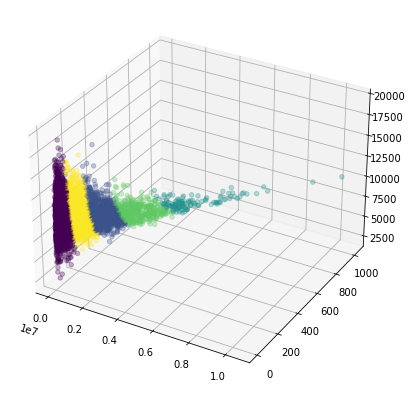

In [45]:
x = df_freq['monetary']
y = df_freq['frequency']
z = df_freq['averagevalue']

fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c=y_pred, alpha=0.3)

#plt.scatter()

plt.show()

# Regression Model

In [4]:
#missing values
dataset['Product_Category_2'] = dataset['Product_Category_2'].fillna(0)
dataset['Product_Category_3'] = dataset['Product_Category_3'].fillna(0)

#Convert Product Category 2 and 3 into integers
dataset['Product_Category_2']=dataset['Product_Category_2'].astype(int)
dataset['Product_Category_3']=dataset['Product_Category_3'].astype(int)

In [5]:
#remove Product ID and User ID
dataset = dataset.drop(['Product_ID','User_ID'],axis=1)
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4,0,8,0,0,7969


In [6]:
#label categorical variables
dataset['Gender']=dataset['Gender'].map( {'M': 0, 'F': 1} ).astype(int)
dataset['City_Category']=dataset['City_Category'].map( {'A': 0, 'B': 1, 'C':2} ).astype(int)

In [7]:
dataset['Age']=dataset['Age'].map( {'0-17': 0, '18-25': 1, '26-35': 2,'36-45':3,'46-50':4,'51-55':5,'55+':6} ).astype(int)
#replaceAge = {'0-17':1,'18-25':2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6,'55+': 7}; data['Age']= data['Age'].replace(replaceAge)

In [8]:
#Get an array of feature variables X and target variable y
X=dataset.drop(['Purchase'],axis=1).values
y=dataset['Purchase'].values

#Select features to keep based on percentile of the highest scores
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)

#get the scores of all the features
name_score=list(zip(dataset.drop(['Purchase'],axis=1).columns.tolist(),Selector_f.scores_))
name_score_df=pd.DataFrame(data=name_score,columns=['Features','F_scores'])
name_score_df.sort_values('F_scores',ascending=False)

,Features,F_scores
6,Product_Category_1,58852.051269
8,Product_Category_3,47205.918173
3,City_Category,2534.870083
0,Gender,1947.864942
7,Product_Category_2,793.653066
2,Occupation,239.538925
1,Age,168.786478
4,Stay_In_Current_City_Years,16.083005
5,Marital_Status,0.008948


In [9]:
data=dataset.copy()
data=data[['City_Category','Product_Category_1', 
       'Product_Category_3','Gender', 'Purchase']]

#One-Hot Encoding
data=pd.get_dummies(data=data,columns=['City_Category','Product_Category_1','Product_Category_3', 'Gender'])
data.head()

,Purchase,City_Category_0,City_Category_1,City_Category_2,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,...,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Gender_0,Gender_1
0,8370,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15200,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1422,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1057,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7969,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:

#Avoid dummy variable trap by removing one category of each categorical feature after encoding but before training
data.drop(['City_Category_0','Product_Category_1_1','Product_Category_3_0', 'Gender_0'],axis=1,inplace=True)

X=data.drop(['Purchase'],axis=1).values
y=data['Purchase'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
print("Prediction\n",y_pred)
print("Actual\n",y_test)

print("R_squared Score:",regressor.score(X_test,y_test))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

from sklearn.metrics import mean_squared_error

print("RMSE:",mean_squared_error(y_test,y_pred)**0.5)

/Users/germanalamillaperalta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/germanalamillaperalta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/germanalamillaperalta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Prediction
 [13315.90611926 16151.68067562 15769.9413976  ...  7386.7306174
  6111.64603143 16204.47406866]
Actual
 [11394 12781 20068 ...  7957  8770 20487]
R_squared Score: 0.6376030412686551
MAE: 2274.8458651001574
RMSE: 2992.951777993816
